In [8]:
import logging
logging.root.handlers = []  # Jupyter messes up logging so needs a reset
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import pandas as pd
import numpy as np
import gensim
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('/home/nikita/PycharmProjects/natural_language/data/test_prepocess.csv')
data.head()

,stars,text,useful,funny
0,3,The good: mini doughnuts and americano friendl...,1,0
1,3,I really like the décor of the place and the w...,0,0
2,5,"Great service, clean and great food, this plac...",1,0
3,5,This place has never failed on me! \nLate nigh...,0,0
4,2,This is a fast food spin off from Paramount Fi...,1,1


In [13]:
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_batch = train_data[0:100000]
test_batch = test_data[0:50000]

In [4]:
def build_sentences_vector(sentence):
    words = sentence.split()
    result = np.zeros(100)
    size = 0
    for word in words:
        if word in embeding_model.wv.vocab:
            result+=embeding_model.wv[word]
            size+=1
    if size == 0:
        size = 1
    result /= size
    return result

In [5]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    
def plot_confusion_matrix(cm, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    my_tags = pd.unique(data.stars)
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('Исходные метки')
    plt.xlabel('Полученные метки')

def predict(vectorizer, classifier, data):
    data_features = vectorizer.transform(data.text)
    predictions = classifier.predict(data_features)
    target = data.stars
    evaluate_prediction(predictions, target)

In [6]:
embeding_model = Word2Vec.load('Yelp_embedings')
len(embeding_model.wv.vocab)

2018-05-07 21:14:24,635 : INFO : loading Word2Vec object from Yelp_embedings
2018-05-07 21:14:25,579 : INFO : loading wv recursively from Yelp_embedings.wv.* with mmap=None
2018-05-07 21:14:25,579 : INFO : setting ignored attribute vectors_norm to None
2018-05-07 21:14:25,580 : INFO : loading vocabulary recursively from Yelp_embedings.vocabulary.* with mmap=None
2018-05-07 21:14:25,581 : INFO : loading trainables recursively from Yelp_embedings.trainables.* with mmap=None
2018-05-07 21:14:25,582 : INFO : setting ignored attribute cum_table to None
2018-05-07 21:14:25,583 : INFO : loaded Yelp_embedings


101865

In [14]:
%%time
train_data_features = []
for sentense in train_batch.text:    
    train_data_features.append(build_sentences_vector(sentense))
test_data_transform = []
for sentense in test_batch.text:
    test_data_transform.append(build_sentences_vector(sentense))

CPU times: user 1min 5s, sys: 422 ms, total: 1min 5s
Wall time: 1min 5s


In [15]:
%%time
gnb = GaussianNB()
gnb.fit(train_data_features, train_batch.stars)

CPU times: user 190 ms, sys: 64.3 ms, total: 254 ms
Wall time: 254 ms


In [16]:
%%time
predicted = gnb.predict(test_data_transform)

CPU times: user 199 ms, sys: 117 ms, total: 316 ms
Wall time: 315 ms


accuracy 0.40946
confusion matrix
 [[4722  986  395  230  541]
 [1407 1304  741  373  231]
 [ 962 1623 1697 1182  458]
 [1246 2162 2322 4011 1967]
 [4340 1819 1421 5121 8739]]
(row=expected, col=predicted)


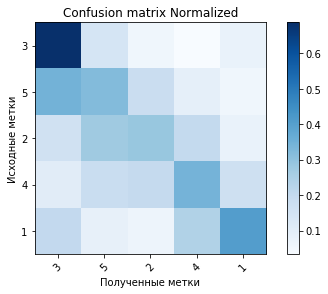

In [17]:
evaluate_prediction(predicted, test_batch.stars)